# Artificial Neural Network (ANN) Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# นำเข้าข้อมูล

In [2]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')  # อ่านข้อมูลจากไฟล์ CSV

# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPAgraduate
count    343.000000  3.430000e+02   343.000000
mean    2564.303207  1.002616e+08     2.610554
std        1.389672  1.621539e+04     0.413158
min     2562.000000  1.002056e+08     2.000000
25%     2563.000000  1.002492e+08     2.310000
50%     2564.000000  1.002611e+08     2.540000
75%     2566.000000  1.002712e+08     2.815000
max     2566.000000  1.002872e+08     3.970000
['GRADUATEYEAR', 'STUDENTID', 'AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'CalculusforScience', 'CommunicativeEnglishForAcademicAnalysisInComputerTechnology', 'CommunicativeEnglishForResearchPresentationInComputerTechnology', 'CommunicativeEnglishForSpecificPurposesInComputerTechnology', 'ComputerArchitecture', 'ComputerNetworkAndDataCommunication', 'DataMiningTechniques', 'DataScience', 'DataStructure', 'DatabaseSystems', 'DevelopmentalEnglish', 'DigitalImageProcessing', 'DigitalMarketing', 'DiscreteMathematicsForComputerScience', 'EnergyAndTechnologyAroundU

,GRADUATEYEAR,STUDENTID,AlgorithmDesignandAnalysis,ArtificialIntelligence,CalculusforScience,CommunicativeEnglishForAcademicAnalysisInComputerTechnology,CommunicativeEnglishForResearchPresentationInComputerTechnology,CommunicativeEnglishForSpecificPurposesInComputerTechnology,ComputerArchitecture,ComputerNetworkAndDataCommunication,...,PoliticsEconomyandSociety,ProgrammingLanguages,Seminar,SensingAndActuationForInternetOfThings,SoftwareEngineering,SpecialTopicsInComputerScience,StatisticalAnalysis,SystemAnalysisAndDesign,ThaiLanguageSkills,GPAgraduate
0,2562,100205568,D+,D+,D+,C,C,B+,D,D+,...,C,D,B,NaN,B+,NaN,F,C+,C+,2.10
1,2562,100205606,C,C+,D,B,C,B+,C,D,...,NaN,D,C+,NaN,D+,NaN,D,C,C,2.00
2,2564,100215265,D,F,F,A,A,A,C+,D,...,C+,D,B,NaN,C+,C+,D,C,C,2.01
3,2562,100225543,C,D,F,B,D+,D,D+,D+,...,NaN,D,B,NaN,D+,C,F,C+,C+,2.10
4,2565,100225544,D+,D,F,D+,C,D+,C+,D+,...,NaN,C,B,NaN,D+,NaN,D+,C,B,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,D+,C+,D,C,B+,B+,B+,D,...,NaN,NaN,A,B,C+,NaN,A,D+,NaN,2.34
339,2566,100282356,C+,A,C+,C,A,B,B+,C,...,NaN,NaN,A,B,A,NaN,A,B+,NaN,3.19
340,2566,100282359,D+,D,C,B,C+,B+,B+,C,...,NaN,NaN,A,B+,C+,NaN,B+,C+,NaN,2.68
341,2566,100282360,C+,D+,D,B,C+,B+,C+,C,...,NaN,NaN,A,B,B,NaN,A,C,NaN,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [3]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = ['AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'CalculusforScience', 'CommunicativeEnglishForAcademicAnalysisInComputerTechnology', 
            'CommunicativeEnglishForResearchPresentationInComputerTechnology', 'CommunicativeEnglishForSpecificPurposesInComputerTechnology', 
            'ComputerArchitecture', 'ComputerNetworkAndDataCommunication', 'DataMiningTechniques', 'DataScience', 'DataStructure', 'DatabaseSystems', 
            'DevelopmentalEnglish', 'DigitalImageProcessing', 'DigitalMarketing', 'DiscreteMathematicsForComputerScience', 
            'EnergyAndTechnologyAroundUs', 'EnglishCriticalReadingForEffectiveCommunication', 'EnglishWritingForEffectiveCommunication', 
            'FundamentalEnglish', 'FundamentalLawsForQualityOfLife', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology', 
            'InternetProgramming', 'IntroductionToComputerInformationScience', 'IntroductionToRobotics', 'LanguageSocietyAndCulture', 'LifePrivacy', 
            'LifeSkills', 'LifeAndHealth', 'LinearAlgebraAndApplications', 'ManAndEnvironment', 'MathematicsForScience', 'MobileApplicationDevelopment', 
            'MultimediaApplicationDevelopment', 'MultimediaAnd WebTechnology', 'MusicStudiesInThaiCulture', 'ObjectOrientedProgramming', 
            'OperatingSystems', 'PhilosophyOfScience', 'PoliticsEconomyandSociety', 'ProgrammingLanguages', 'Seminar ', 
            'SensingAndActuationForInternetOfThings', 'SoftwareEngineering', 'SpecialTopicsInComputerScience', 'StatisticalAnalysis', 
            'SystemAnalysisAndDesign', 'ThaiLanguageSkills']  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPAgraduate']

### ตรวจสอบขนาดของ X และ y


In [4]:
print(X.shape)
print(y.shape)

(343, 49)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [5]:
# แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test) ในสัดส่วน 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการปรับมาตรฐานข้อมูล (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนที่ 3: สร้างโมเดล ANN และฝึกสอน

In [6]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(X_train.shape[1],)))  # เลเยอร์แรก
model.add(Dense(15, activation='relu'))  # เลเยอร์ที่สอง
model.add(Dense(1))  # เลเยอร์สุดท้าย (สำหรับการทำนาย)

# คอมไพล์โมเดล
model.compile(optimizer= Adam(learning_rate = 0.075 ), loss='mean_squared_error')

# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=1)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,656 (6.47 KB)

 Trainable params: 1,656 (6.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7152 - val_loss: 0.8546
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8013 - val_loss: 0.5302
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2939 - val_loss: 0.2932
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1447 - val_loss: 0.1361
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1045 - val_loss: 0.0836
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651 - val_loss: 0.0544
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0316 - val_loss: 0.0523
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292 - val_loss: 0.0445
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0208 - val_loss: 0.0372
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0337
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0580
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

# ขั้นตอนที่ 4: ทำนายโดยใช้ชุดทดสอบ

In [7]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


# ขั้นตอนที่ 5: ประเมินผลโมเดล

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์

In [9]:
print(f'Mean Squared Error (MSE): {mse}')  # ค่าความคลาดเคลื่อนเฉลี่ย
print(f'R-squared (R^2): {r2}')  # ค่าความแม่นยำของโมเดล
print('')

# แสดงค่า weights ของทุกเลเยอร์ในโมเดล ANN
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # ดึงค่า weights ของเลเยอร์
    print(f"Layer {i + 1} Weights:")
    print(weights[0])  # ค่า weights
    print("Biases:")
    print(weights[1])  # ค่า biases

Mean Squared Error (MSE): 0.04967316758528637
R-squared (R^2): 0.6209469118587693

Layer 1 Weights:
[[ 0.05189727  0.00470029 -0.1419252  ...  0.5005934  -0.36885804
   0.25270122]
 [-0.32728657  0.17265972 -0.29768032 ... -0.37636122 -0.44307142
  -0.15931852]
 [-0.77522534 -0.00098334  0.03793446 ...  0.9617114  -0.6136488
  -0.48702863]
 ...
 [ 0.5507526  -0.37536675  0.15866172 ... -0.38391453 -0.39530408
   0.11795755]
 [-0.01697268  0.15911594 -0.2804146  ...  0.10766484 -0.27983913
  -0.22550203]
 [-0.25895038 -0.09900486 -0.20289831 ...  0.23879454  0.24408656
  -0.41632268]]
Biases:
[ 0.21634576 -0.62381035  0.19185083 -0.16456202 -0.57363814 -0.28516048
 -0.96323913 -0.9394471   0.5575801   0.13609438  0.42963597 -0.6398213
 -0.46558744 -0.43672025 -0.72850513 -1.2122844  -0.18180934 -0.45653334
 -0.2768879   0.59873277 -0.65082276  0.13772641 -0.5149909  -0.4923489
 -0.48759508]
Layer 2 Weights:
[[-5.93908906e-01  3.61069441e-01 -3.68862152e-01 -2.04828411e-01
  -6.82802022e

# กราฟแสดงผล

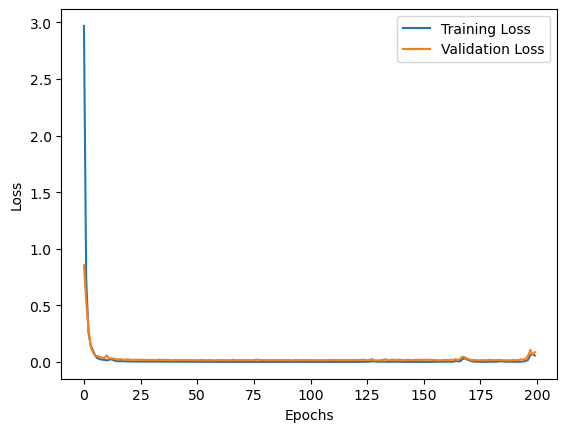

In [10]:
# สร้างกราฟแสดงการฝึกโมเดล
plt.plot(history.history['loss'], label='Training Loss')  # Loss ในชุดฝึก
plt.plot(history.history['val_loss'], label='Validation Loss')  # Loss ในชุดทดสอบ
plt.xlabel('Epochs')  # ชื่อแกน X
plt.ylabel('Loss')  # ชื่อแกน Y
plt.legend()  # เพิ่มคำอธิบายกราฟ
plt.show()  # แสดงกราฟ